# Beyonce's  Rennaissance Album : A Twitter Sentimental Analysis Project

### by Chinonso OKONKWO

## 1. Introduction

This is a Data Analytics Project which focuses on Renaissance Twitter data using Natural Language Processing (NLP) Techniques.
Beyonce's Renaissance Album was released on July 29th, 2022. The album dominated the twitter trends and spaces across different locations. For a Period of 10 days, I decided to gather tweets that had the word "Renaissance" or "Rennaissance" in them using Tweepy Library and Twitter's API. I gathered over 140K tweets.
This project uses Several Python Libraries such as:
<br>
 - Pandas (for Data Cleaning/Manipulation)
 - Tweepy (for Tweets Gathering)
 - NLTK (Natural Language Toolkit)
 - TextBlob (for Sentiment Analysis)
 - MatPlotlib & WordCloud (for Data Visualization)
 - Emot (for Emojis identification)

## Table of Contents

1. [Introduction](#1.-Introduction)
<br>

2. [Data Gathering](#2.-Data-Gathering)
<br>

3. [Data Assessment](#3.-Data-Assessment)
<br>

4. [Data Cleaning](#4.-Data-Cleaning)
<br>
5. [Data Preprocessing](#5.-Data-Preprocessing)
<br>
6. [Sentiment Analysis](#6.-Sentiment-Analysis)
<br>

7. [Explanatory Analysis/ Data Visualization](#7.-Explanatory-Analysis/-Data-Visualization)
<br>

8. [Additional Comments](#8.-Additional-Comments)

## 2. Data Gathering

In this section, I plan on querying twitter for data, making use of an API and Tweepy Library, I'll gather the data in batches, due to Twitters request limitataions.<br>
I'll store gathered data into individual csv files. Then later append it as a single dataframe.
<br>
I intend to gather data within 24th July and 2nd August(10days)

**Importing Libraries**

Importing all libraries I'll be needing. I'll add more as I go along if required.

In [1]:
# importing autotime to check how long it takes each code to run
import autotime
%load_ext autotime

In [2]:
import numpy as np
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import re


from nltk.corpus import stopwords # to get stopwords from NLTK library
from nltk.tokenize import word_tokenize # to create word tokens
from nltk.stem import WordNetLemmatizer # to reduce words to orginal form
from nltk.corpus import words # Get all words in english language


import textblob
from textblob import TextBlob


from wordcloud import WordCloud
from emot.emo_unicode import UNICODE_EMOJI # For emojis

import warnings


In [ ]:
# Access keys and tokens from Twitter Developer Account
# These are hidden to comply with Twitter's API terms and conditions
# You'll need to get a Twitter developer Account to get your own keys to use for this part.
consumer_key = '..........................'  
consumer_secret = '............................'
access_key = '...........-........................'
access_secret = '...........................'

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret) #Pass in Consumer key and secret for authentication by API
auth.set_access_token (access_key, access_secret) # Pass in Access key and secret for authentication by API
api = tweepy.API(auth, wait_on_rate_limit = True) #sleeps when API limit is reached

In [ ]:
#create keywords to search for , filter links, retweets, replies
search_words = "#Renaissance OR #Rennaissance"
search_query = search_words + "-filter:retweets AND -filter:replies"

In [ ]:
# specifying limit of 1,000,000 tweets
# I prefer to gather tweets in batches then append, due to twitter's tweet request limitation
limit=1000000

# using tweepy to search for tweets with the key words in English 
tweets = tweepy.Cursor(api.search_tweets, q=search_query, count=100, lang="en", tweet_mode='extended').items(limit)

# specifying column headers of each tweet attribute
columns=['id', 'username', 'time_of_tweet', 'tweet', 'location', 'retweets', 'likes', 'followers', 'following', 'verified',
         'tweet_source']

In [ ]:
# appending each tweet attribute to the list data
data= []
for tweet in tweets:
    data.append([tweet.id, tweet.user.screen_name, tweet.created_at, tweet.full_text, tweet.user.location, tweet.retweet_count, tweet.favorite_count, tweet.user.followers_count, tweet.user.friends_count, tweet.user.verified, tweet.source])

In [ ]:
# creating a dataframe
df = pd.DataFrame(data, columns=columns)

# cheking the number of rows and columns
df.shape

In [ ]:
df.head() 

In [ ]:
df.tail()

In [ ]:
# saving dataframe to a csv file
df.to_csv('Renaissance29July-01August(05_01_07am_to_22_04_49pm).csv')

**Next;**

I'll use the last tweet id in df.tail() as the max_id number and repeat the process. Specifying a maximum id lets the Twitter API collect tweets before that Id, Since, I need to pull older tweets.

In [ ]:
limit = 500000

# using tweepy to search for tweets with the key words in English 
tweets = tweepy.Cursor(api.search_tweets, q=search_query, max_id=1552881884836859905, count=100, lang="en", 
                       tweet_mode='extended').items(limit)

# specifying column headers of each tweet attribute
columns=['id', 'username', 'time_of_tweet', 'tweet', 'location', 'retweets', 'likes', 'followers', 'following', 
         'verified', 'tweet_source']

In [ ]:
# appending each tweet attribute to the list data
data= []
for tweet in tweets:
    data.append([tweet.id, tweet.user.screen_name, tweet.created_at, tweet.full_text, tweet.user.location, tweet.retweet_count, tweet.favorite_count, tweet.user.followers_count, tweet.user.friends_count, tweet.user.verified, tweet.source])

In [ ]:
# creating a dataframe
df = pd.DataFrame(data, columns=columns)

# cheking the number of rows and columns
df.shape

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
# saving dataframe to a csv file
df.to_csv('Renaissance23July-29July(02_50_07am_to_05_01_07am).csv')

**Next;**

I'll Gather data using since_id to get new tweets.
I'll gather up to 2nd August

In [ ]:
limit = 500000

# using tweepy to search for tweets with the key words in English 
tweets = tweepy.Cursor(api.search_tweets, q=search_query, since_id=1554226674056806405, count=100, lang="en", tweet_mode='extended').items(limit)

# specifying column headers of each tweet attribute
columns=['id', 'username', 'time_of_tweet', 'tweet', 'location', 'retweets', 'likes', 'followers', 'following', 'verified', 'tweet_source']

In [ ]:
# appending each tweet attribute to the list data
data= []
for tweet in tweets:
    data.append([tweet.id, tweet.user.screen_name, tweet.created_at, tweet.full_text, tweet.user.location, tweet.retweet_count, tweet.favorite_count, tweet.user.followers_count, tweet.user.friends_count, tweet.user.verified, tweet.source])

In [ ]:
# creating a dataframe
df = pd.DataFrame(data, columns=columns)
df.shape

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
# saving dataframe to a csv file
df.to_csv('Renaissance1August-3August(22_05_07pm_to_00_07_12pm).csv')

## Read in files using read_csv

In [3]:
# Reading in the files using pandas read_csv
df1 = pd.read_csv('Renaissance23July-29July(02_50_07am_to_05_01_07am).csv')
df2 = pd.read_csv('Renaissance29July-01August(05_01_07am_to_22_04_49pm).csv')
df3 = pd.read_csv('Renaissance1August-3August(22_05_07pm_to_00_07_12pm).csv')

In [4]:
# merge the two dataframes as one
tweet_df = pd.concat([df1, df2, df3], ignore_index=True)

## 3. Data Assessment

Data was assessed here for data quality issues such as missing data, incorrect datatypes, duplicates e.t.c. and Data Tidiness issues. <br>
While assessing for duplicates, tweet id is considered as the Primary key/ Unique identifier for all the dataframe

**Column Descriptions**
- id - Unique id for each tweet
- username - The twitter username of the tweeter
- time_of_tweet - The time the tweet was tweeted
- tweet - The content of the tweet
- location - Location of Tweeter
- retweets - The number of times the tweet has been retweeted
- likes - The number of times the tweet has been liked
- followers - The number of followers of the Tweeter
- following - The number of followings of the Tweeter
- verified - Whether the Tweeter is verified or not? True/False
- tweet_source - The Source of Tweet

In [5]:
# Checking the number of rows and columns
tweet_df.shape

(147836, 12)

The dataframe contains 147,836 rows of data and 12  columns.

In [6]:
# Checking the first five rows of dataframe
tweet_df.head()

,Unnamed: 0,id,username,time_of_tweet,tweet,location,retweets,likes,followers,following,verified,tweet_source
0,0,1552881884836859905,_Chrisss7,2022-07-29 05:01:07+00:00,Cozy is so cunt 😭🔥 #RENAISSANCE,904,0,0,396,391,False,Twitter for iPhone
1,1,1552881884782370817,anseldeangelo,2022-07-29 05:01:07+00:00,Listening to #RENAISSANCE high was one of the ...,"Florida, USA",0,0,3101,728,False,Twitter for iPhone
2,2,1552881883389861889,juhdayyy,2022-07-29 05:01:06+00:00,i got 50-11 captions ready to go 🤭 #RENAISSANCE,757,0,0,639,584,False,Twitter for iPhone
3,3,1552881883217895424,sir_marcell,2022-07-29 05:01:06+00:00,Calling all singers!!!! The scales at the end ...,"Atlanta, GA",0,1,773,460,False,Twitter for iPhone
4,4,1552881883205099520,JadedTyson,2022-07-29 05:01:06+00:00,PURE/HONEY unlocked the inner voguer that resi...,LA He/They,0,2,252,232,False,Twitter for iPhone


In [7]:
# Checking the last five rows of dataframe
tweet_df.tail()

,Unnamed: 0,id,username,time_of_tweet,tweet,location,retweets,likes,followers,following,verified,tweet_source
147831,5776,1554227010020392960,jqkcl,2022-08-01 22:06:09+00:00,My top artist in July on @TIDAL was @Beyonce. ...,yay area + ucsd,0,1,574,249,False,Twitter for iPhone
147832,5777,1554226956526313473,cicidreamfish,2022-08-01 22:05:57+00:00,"“Head on a pillow, hike it in the air…”\nAlien...","Kingston, Ontario",0,1,260,153,False,Twitter for iPhone
147833,5778,1554226862133579776,iamjordanlive,2022-08-01 22:05:34+00:00,No transition hit better!!🙌🏾🔥\n#RENAISSANCE ht...,"Atlanta, GA",0,0,570,1541,False,Twitter for iPhone
147834,5779,1554226760081764352,rolecallpod,2022-08-01 22:05:10+00:00,I should’ve/could’ve used Car Wash but… #Beyon...,Bay Area,2,5,541,302,False,Twitter for iPhone
147835,5780,1554226749642260482,S4NTINY_,2022-08-01 22:05:07+00:00,#RENAISSANCE ON BUCLE 🥵,Lima - Perú,0,0,2037,106,False,Twitter for iPhone


In [8]:
# Checking random 5 rows of data
tweet_df.sample(5)

,Unnamed: 0,id,username,time_of_tweet,tweet,location,retweets,likes,followers,following,verified,tweet_source
73981,9220,1553673988378972160,Tauruspapi2,2022-07-31 09:28:39+00:00,That Beyoncé song move does something to me 🕺🏽...,"New York, USA",0,1,340,1772,False,Twitter for iPhone
2578,2578,1552880409670713346,NaomiRaekwon,2022-07-29 04:55:15+00:00,Ms. Honey! 🐝 #RENAISSANCE,GWoodMS -- MemphisTN,0,0,1892,2462,False,Twitter for iPhone
119048,54287,1552959510548996096,HRFMichael,2022-07-29 10:09:34+00:00,God it's good #RENAISSANCE,"Glasgow, Scotland",0,1,3224,2057,False,Twitter Web App
120667,55906,1552945189819383808,oldkustom,2022-07-29 09:12:40+00:00,$14.0 Only ~ NOS Yamaha 26H-12427-00 GASKET HS...,United States,0,0,160,1,False,Zapier.com
107798,43037,1553021039890034688,KeIVBey,2022-07-29 14:14:04+00:00,Twinkie Clark when she wakes up and hears what...,Platform 9 3/4,0,2,986,585,False,Twitter for iPhone


In [9]:
# Getting a concise summary of data
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147836 entries, 0 to 147835
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     147836 non-null  int64 
 1   id             147836 non-null  int64 
 2   username       147836 non-null  object
 3   time_of_tweet  147836 non-null  object
 4   tweet          147836 non-null  object
 5   location       109470 non-null  object
 6   retweets       147836 non-null  int64 
 7   likes          147836 non-null  int64 
 8   followers      147836 non-null  int64 
 9   following      147836 non-null  int64 
 10  verified       147836 non-null  bool  
 11  tweet_source   147836 non-null  object
dtypes: bool(1), int64(6), object(5)
memory usage: 12.5+ MB


In [10]:
# Checking for duplicates
tweet_df.duplicated(subset='id').sum()

1

There is a duplicate entry in the dataframe

In [11]:
# Viewing duplicates
pd.concat(g for _, g in tweet_df.groupby("id") if len(g) > 1)

,Unnamed: 0,id,username,time_of_tweet,tweet,location,retweets,likes,followers,following,verified,tweet_source
0,0,1552881884836859905,_Chrisss7,2022-07-29 05:01:07+00:00,Cozy is so cunt 😭🔥 #RENAISSANCE,904,0,0,396,391,False,Twitter for iPhone
142054,77293,1552881884836859905,_Chrisss7,2022-07-29 05:01:07+00:00,Cozy is so cunt 😭🔥 #RENAISSANCE,904,0,0,396,391,False,Twitter for iPhone


In [12]:
# Checking for missing data or null
tweet_df.isnull().sum()

Unnamed: 0           0
id                   0
username             0
time_of_tweet        0
tweet                0
location         38366
retweets             0
likes                0
followers            0
following            0
verified             0
tweet_source         0
dtype: int64

In [13]:
# Checking statistics of dataframe
tweet_df.describe()

,Unnamed: 0,id,retweets,likes,followers,following
count,147836.000000,1.478360e+05,147836.000000,147836.000000,1.478360e+05,147836.000000
mean,34503.171359,1.553045e+18,4.381193,27.628271,1.216340e+04,1035.612821
std,21530.100008,4.586215e+14,88.264029,542.998659,3.190928e+05,4003.497084
min,0.000000,1.550675e+18,0.000000,0.000000,0.000000e+00,0.000000
25%,15588.750000,1.552869e+18,0.000000,0.000000,1.870000e+02,249.000000
50%,34068.000000,1.552891e+18,0.000000,1.000000,5.610000e+02,551.000000
75%,52547.250000,1.553089e+18,0.000000,2.000000,1.432000e+03,1070.000000
max,77293.000000,1.554620e+18,10424.000000,65029.000000,7.583368e+07,584114.000000


In [14]:
# Checking the datatypes of each column
tweet_df.dtypes

Unnamed: 0        int64
id                int64
username         object
time_of_tweet    object
tweet            object
location         object
retweets          int64
likes             int64
followers         int64
following         int64
verified           bool
tweet_source     object
dtype: object

## Assessments

These are the data issues I observed;

1. Erroneous datatypes
2. Presence of tweets before 24th July and after 2 August
3. Irrelevant column 'unnnamed' 
4. Missing values in 'location' column
5. Duplicate entry in dataframe

## 4. Data Cleaning

The dataframe is cleaned in this section. Erroneous datatypes were changed to correct datatypes (id was converted from integer to string because it is a unique identifier and not to be used for calculations), Missing values were handled by filling with 'No Location', duplicate entries were dropped, the dataframe was reduced to the correct timeframe as well.

**Making  a Copy of Data Before Cleaning**

In [15]:
tweets_df = tweet_df.copy()

## Issue 1:

**Define** <br>
Convert time_of_tweet to datetime and tweet id to string.

**Code**

In [16]:
# coverting to datetime using pandas to_datetime
tweets_df['time_of_tweet'] = tweets_df['time_of_tweet'].apply(pd.to_datetime)

In [17]:
# converting id to string
tweets_df['id'] = tweets_df['id'].astype(str)

**Test**

In [18]:
# Checking the datatypes
tweets_df.dtypes

Unnamed: 0                     int64
id                            object
username                      object
time_of_tweet    datetime64[ns, UTC]
tweet                         object
location                      object
retweets                       int64
likes                          int64
followers                      int64
following                      int64
verified                        bool
tweet_source                  object
dtype: object

### Issue 2:

**Define** <br>
Drop tweets before 2022-07-24 and after 2022-08-02

**Code**

Note, Twitter's time is UTC

In [19]:
# Specifying start date and end date
start_date = '2022-07-24 00:00:00+00:00'
end_date = '2022-08-03 00:00:00+00:00'

In [20]:
# Dropping tweets
mask = (tweets_df['time_of_tweet'] >= start_date) & (tweets_df['time_of_tweet'] < end_date)
tweets_df = tweets_df.loc[mask]

**Test**

In [21]:
# Checking to see if the shape has been reduced since we dropped rows
tweets_df.shape

(147531, 12)

In [22]:
tweets_df.time_of_tweet.max()

Timestamp('2022-08-02 23:59:59+0000', tz='UTC')

In [23]:
tweets_df.time_of_tweet.min()

Timestamp('2022-07-24 00:11:29+0000', tz='UTC')

**COMMENT:** Tweets are now ranging from 24th of July to 2nd of August. A span of 10 days

### Issue 3:

**Define** <br>
Drop Unnamed: 0 column from dataframe

**Code**

In [24]:
#Dropping unnamed:0 column
tweets_df.drop(columns = ['Unnamed: 0'], axis=1, inplace=True)

In [25]:
# Reset index
tweets_df = tweets_df.reset_index(drop=True)

**Test**

In [26]:
# checking to see if column has been dropped successfully
tweets_df.columns

Index(['id', 'username', 'time_of_tweet', 'tweet', 'location', 'retweets',
       'likes', 'followers', 'following', 'verified', 'tweet_source'],
      dtype='object')

In [27]:
tweets_df.tail()

,id,username,time_of_tweet,tweet,location,retweets,likes,followers,following,verified,tweet_source
147526,1554227010020392960,jqkcl,2022-08-01 22:06:09+00:00,My top artist in July on @TIDAL was @Beyonce. ...,yay area + ucsd,0,1,574,249,False,Twitter for iPhone
147527,1554226956526313473,cicidreamfish,2022-08-01 22:05:57+00:00,"“Head on a pillow, hike it in the air…”\nAlien...","Kingston, Ontario",0,1,260,153,False,Twitter for iPhone
147528,1554226862133579776,iamjordanlive,2022-08-01 22:05:34+00:00,No transition hit better!!🙌🏾🔥\n#RENAISSANCE ht...,"Atlanta, GA",0,0,570,1541,False,Twitter for iPhone
147529,1554226760081764352,rolecallpod,2022-08-01 22:05:10+00:00,I should’ve/could’ve used Car Wash but… #Beyon...,Bay Area,2,5,541,302,False,Twitter for iPhone
147530,1554226749642260482,S4NTINY_,2022-08-01 22:05:07+00:00,#RENAISSANCE ON BUCLE 🥵,Lima - Perú,0,0,2037,106,False,Twitter for iPhone


### Issue 4:

**Define** <br>
Replace Missing values in Location with 'No Location'

**Code**

In [28]:
# filling nulls in location column using fillna
tweets_df.location.fillna('No Location', inplace=True)

**Test**

In [29]:
# Checking for missing values/ nulls
tweets_df.isnull().sum()

id               0
username         0
time_of_tweet    0
tweet            0
location         0
retweets         0
likes            0
followers        0
following        0
verified         0
tweet_source     0
dtype: int64

### Issue 5:

**Define** <br>
Drop Duplicates

**Code**

In [30]:
tweets_df.drop_duplicates(subset='id', inplace=True)

**Test**

In [31]:
# Checking for duplicates
tweets_df.duplicated(subset='id').sum()

0

**COMMENT:** I'm done with all cleaning so I'll save it to a csv file.

**STORING CLEANED DATAFRAME TO A CSV FILE**

In [32]:
tweets_df.to_csv('Renaissance_Cleaned.csv')

## 5. Data Preprocessing

Data preprocessing involves all data cleaning in preparing tweets for Sentiment analysis.
To do this, I created several functions which I applied to 'tweet' column in my dataframe to produce desired results.
Properly preprocessing data results in more accurate downstream processes.


<br>
Also, for my Word Cloud, I wanted to show the words used to describe the album, so I created a function to extract some Positive Music words to a new column.


In [33]:
# Defining a function to extract hashtags with REGEX(Regular Expressions)
def getHashtags(tweet):
    tweet = tweet.lower()  #converts tweet to lower case
    tweet = re.findall(r'\#\w+',tweet)  
    return " ".join(tweet)

In [34]:
# Getting Hashtags and storing in column 'Hashtags'
tweets_df['hashtags'] = tweets_df['tweet'].apply(getHashtags)
tweets_df.head()

,id,username,time_of_tweet,tweet,location,retweets,likes,followers,following,verified,tweet_source,hashtags
0,1552881884836859905,_Chrisss7,2022-07-29 05:01:07+00:00,Cozy is so cunt 😭🔥 #RENAISSANCE,904,0,0,396,391,False,Twitter for iPhone,#renaissance
1,1552881884782370817,anseldeangelo,2022-07-29 05:01:07+00:00,Listening to #RENAISSANCE high was one of the ...,"Florida, USA",0,0,3101,728,False,Twitter for iPhone,#renaissance
2,1552881883389861889,juhdayyy,2022-07-29 05:01:06+00:00,i got 50-11 captions ready to go 🤭 #RENAISSANCE,757,0,0,639,584,False,Twitter for iPhone,#renaissance
3,1552881883217895424,sir_marcell,2022-07-29 05:01:06+00:00,Calling all singers!!!! The scales at the end ...,"Atlanta, GA",0,1,773,460,False,Twitter for iPhone,#renaissance
4,1552881883205099520,JadedTyson,2022-07-29 05:01:06+00:00,PURE/HONEY unlocked the inner voguer that resi...,LA He/They,0,2,252,232,False,Twitter for iPhone,#renaissance


In [35]:
# Store hashtags in a list
hashtags_list = tweets_df['hashtags'].tolist()

# Iterate over all hashtags and split where there is more than one hashtag per row of data
hashtags = []
for item in hashtags_list:
    item = item.split()
    for i in item:
        hashtags.append(i)

# Importing Collection module to determine unique count of all hashtags used
from collections import Counter

# Determine Unique count of all hashtags used
counts = Counter(hashtags)
hashtags_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
hashtags_df.columns = ['hashtags', 'count']
hashtags_df.sort_values(by='count', ascending=False, inplace=True)
print("The Total Number of Unique Hashtags is: ", hashtags_df.shape[0])

The Total Number of Unique Hashtags is:  8761


In [36]:
# Checking the hashtag dataframe for the top 10 hashtags used
hashtags_df.head(10)

,hashtags,count
0,#renaissance,144683
1,#beyonce,19450
3,#beyhive,4443
420,#rennaissance,4034
15,#beyoncé,2028
11,#1,1444
10,#clubrenaissance,1423
43,#churchgirl,843
2,#aliensuperstar,790
31,#breakmysoul,742


In [37]:
# Saving hashtags dataframe to a csv file
hashtags_df.to_csv('Ren_Hashtags.csv')

In [38]:
# Defining a function
def getTweetsLower(tweet):
    tweet = tweet.lower()  #converts tweet to lower case
    return tweet

In [39]:
# Get Tweets in lower case and store as tweet_lowercase
tweets_df['tweet_lowercase'] = tweets_df['tweet'].apply(getTweetsLower)
tweets_df.head()

,id,username,time_of_tweet,tweet,location,retweets,likes,followers,following,verified,tweet_source,hashtags,tweet_lowercase
0,1552881884836859905,_Chrisss7,2022-07-29 05:01:07+00:00,Cozy is so cunt 😭🔥 #RENAISSANCE,904,0,0,396,391,False,Twitter for iPhone,#renaissance,cozy is so cunt 😭🔥 #renaissance
1,1552881884782370817,anseldeangelo,2022-07-29 05:01:07+00:00,Listening to #RENAISSANCE high was one of the ...,"Florida, USA",0,0,3101,728,False,Twitter for iPhone,#renaissance,listening to #renaissance high was one of the ...
2,1552881883389861889,juhdayyy,2022-07-29 05:01:06+00:00,i got 50-11 captions ready to go 🤭 #RENAISSANCE,757,0,0,639,584,False,Twitter for iPhone,#renaissance,i got 50-11 captions ready to go 🤭 #renaissance
3,1552881883217895424,sir_marcell,2022-07-29 05:01:06+00:00,Calling all singers!!!! The scales at the end ...,"Atlanta, GA",0,1,773,460,False,Twitter for iPhone,#renaissance,calling all singers!!!! the scales at the end ...
4,1552881883205099520,JadedTyson,2022-07-29 05:01:06+00:00,PURE/HONEY unlocked the inner voguer that resi...,LA He/They,0,2,252,232,False,Twitter for iPhone,#renaissance,pure/honey unlocked the inner voguer that resi...


In [40]:
# Creating a List containing Renaissance Track
renaissance_tracks = ["i'mthatgirl", "cozy", "aliensuperstar", "cuffit", "energy", "breakmysoul", "churchgirl", 
                     "plasticoffthesofa", "virgo'sgroove", "move", "heated", "thique", "allupinyourmind",
                      "americahasaproblem", "pure/honey", "summerrenaissance"]

In [41]:
# Define function to replace track names as one word track name in a new column tweet_track
def trackNames(ren_track):
    replacements = [("plastic off the sofa","plasticoffthesofa"), ("i'm that girl", "i'mthatgirl"), 
                    ("im that girl", "i'mthatgirl"),("alien superstar", "aliensuperstar"), ("cuff it", "cuffit"), 
                    ("break my soul", "breakmysoul"), ("church girl", "churchgirl"), ("virgo's groove", "virgo'sgroove"), 
                    ("virgo groove", "virgo'sgroove"), ("virgos groove", "virgo'sgroove"), 
                    ("all up in your mind", "allupinyourmind"), ("america has a problem", "americahasaproblem"), 
                    ("summer renaissance", "summerrenaissance")]

    for pat,repl in replacements:
        ren_track = re.sub(pat, repl, ren_track)
    return ren_track
tweets_df['tweet_track'] = tweets_df['tweet_lowercase'].apply(trackNames)
tweets_df.head()                      

,id,username,time_of_tweet,tweet,location,retweets,likes,followers,following,verified,tweet_source,hashtags,tweet_lowercase,tweet_track
0,1552881884836859905,_Chrisss7,2022-07-29 05:01:07+00:00,Cozy is so cunt 😭🔥 #RENAISSANCE,904,0,0,396,391,False,Twitter for iPhone,#renaissance,cozy is so cunt 😭🔥 #renaissance,cozy is so cunt 😭🔥 #renaissance
1,1552881884782370817,anseldeangelo,2022-07-29 05:01:07+00:00,Listening to #RENAISSANCE high was one of the ...,"Florida, USA",0,0,3101,728,False,Twitter for iPhone,#renaissance,listening to #renaissance high was one of the ...,listening to #renaissance high was one of the ...
2,1552881883389861889,juhdayyy,2022-07-29 05:01:06+00:00,i got 50-11 captions ready to go 🤭 #RENAISSANCE,757,0,0,639,584,False,Twitter for iPhone,#renaissance,i got 50-11 captions ready to go 🤭 #renaissance,i got 50-11 captions ready to go 🤭 #renaissance
3,1552881883217895424,sir_marcell,2022-07-29 05:01:06+00:00,Calling all singers!!!! The scales at the end ...,"Atlanta, GA",0,1,773,460,False,Twitter for iPhone,#renaissance,calling all singers!!!! the scales at the end ...,calling all singers!!!! the scales at the end ...
4,1552881883205099520,JadedTyson,2022-07-29 05:01:06+00:00,PURE/HONEY unlocked the inner voguer that resi...,LA He/They,0,2,252,232,False,Twitter for iPhone,#renaissance,pure/honey unlocked the inner voguer that resi...,pure/honey unlocked the inner voguer that resi...


In [42]:
# Define function to extract Renaissance Track from each tweet_track
def getRenaissanceTrack(tweet_track):
    tweet_track = tweet_track.lower() #Reduces tweet to lower case
    tweet_tokens = word_tokenize(tweet_track) #splits each word in tweet_track for parsing
    ren_track = [char for char in tweet_tokens if char in renaissance_tracks] 
    return " ".join(ren_track)

In [43]:
# Extract tracks to a new column
tweets_df['track'] = tweets_df['tweet_track'].apply(getRenaissanceTrack)
tweets_df.head()

,id,username,time_of_tweet,tweet,location,retweets,likes,followers,following,verified,tweet_source,hashtags,tweet_lowercase,tweet_track,track
0,1552881884836859905,_Chrisss7,2022-07-29 05:01:07+00:00,Cozy is so cunt 😭🔥 #RENAISSANCE,904,0,0,396,391,False,Twitter for iPhone,#renaissance,cozy is so cunt 😭🔥 #renaissance,cozy is so cunt 😭🔥 #renaissance,cozy
1,1552881884782370817,anseldeangelo,2022-07-29 05:01:07+00:00,Listening to #RENAISSANCE high was one of the ...,"Florida, USA",0,0,3101,728,False,Twitter for iPhone,#renaissance,listening to #renaissance high was one of the ...,listening to #renaissance high was one of the ...,
2,1552881883389861889,juhdayyy,2022-07-29 05:01:06+00:00,i got 50-11 captions ready to go 🤭 #RENAISSANCE,757,0,0,639,584,False,Twitter for iPhone,#renaissance,i got 50-11 captions ready to go 🤭 #renaissance,i got 50-11 captions ready to go 🤭 #renaissance,
3,1552881883217895424,sir_marcell,2022-07-29 05:01:06+00:00,Calling all singers!!!! The scales at the end ...,"Atlanta, GA",0,1,773,460,False,Twitter for iPhone,#renaissance,calling all singers!!!! the scales at the end ...,calling all singers!!!! the scales at the end ...,plasticoffthesofa
4,1552881883205099520,JadedTyson,2022-07-29 05:01:06+00:00,PURE/HONEY unlocked the inner voguer that resi...,LA He/They,0,2,252,232,False,Twitter for iPhone,#renaissance,pure/honey unlocked the inner voguer that resi...,pure/honey unlocked the inner voguer that resi...,pure/honey


In [44]:
# Store track in a list
track_list = tweets_df['track'].tolist()

# Iterate over all track names and split where there is more than one track
track = []
for item in track_list:
    item = item.split()
    for i in item:
        track.append(i)

# Determine Unique count of all track
counts = Counter(track)
track_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
track_df.columns = ['Ren_track', 'Count']
track_df.sort_values(by='Count', ascending=False, inplace=True)
print("The Total Number of Unique Tracks is: ", track_df.shape[0])
track_df

The Total Number of Unique Tracks is:  16


,Ren_track,Count
13,churchgirl,7170
4,aliensuperstar,6835
9,cuffit,6417
7,energy,4702
8,breakmysoul,4626
11,heated,4365
0,cozy,4338
12,move,3656
1,plasticoffthesofa,3358
14,thique,3151


In [45]:
# Saving Track df to csv file
track_df.to_csv('Ren_Track.csv')

In [46]:
# Creating a list of Positive words about the album
renaissance_positive_words = ["noskips", "noshuffles", "vocals", "lyrics", "beats", "production", 
                     "samples", "harmonies"]

In [47]:
# Define function to replace Positive words as one word Positive words in a new column tweet_positive_words
def positiveWords(ren_positive_words):
    replacements = [("no skips","noskips"), ("zero skips", "noskips"), ("0 skips", "noskips"), ("no shuffle", "noshuffles"), 
                    ("no shuffles", "noshuffles")]
    for pat,repl in replacements:
        ren_positive_words = re.sub(pat, repl, ren_positive_words)
    return ren_positive_words
tweets_df['tweet_positive_words'] = tweets_df['tweet_lowercase'].apply(positiveWords)
tweets_df.head()

,id,username,time_of_tweet,tweet,location,retweets,likes,followers,following,verified,tweet_source,hashtags,tweet_lowercase,tweet_track,track,tweet_positive_words
0,1552881884836859905,_Chrisss7,2022-07-29 05:01:07+00:00,Cozy is so cunt 😭🔥 #RENAISSANCE,904,0,0,396,391,False,Twitter for iPhone,#renaissance,cozy is so cunt 😭🔥 #renaissance,cozy is so cunt 😭🔥 #renaissance,cozy,cozy is so cunt 😭🔥 #renaissance
1,1552881884782370817,anseldeangelo,2022-07-29 05:01:07+00:00,Listening to #RENAISSANCE high was one of the ...,"Florida, USA",0,0,3101,728,False,Twitter for iPhone,#renaissance,listening to #renaissance high was one of the ...,listening to #renaissance high was one of the ...,,listening to #renaissance high was one of the ...
2,1552881883389861889,juhdayyy,2022-07-29 05:01:06+00:00,i got 50-11 captions ready to go 🤭 #RENAISSANCE,757,0,0,639,584,False,Twitter for iPhone,#renaissance,i got 50-11 captions ready to go 🤭 #renaissance,i got 50-11 captions ready to go 🤭 #renaissance,,i got 50-11 captions ready to go 🤭 #renaissance
3,1552881883217895424,sir_marcell,2022-07-29 05:01:06+00:00,Calling all singers!!!! The scales at the end ...,"Atlanta, GA",0,1,773,460,False,Twitter for iPhone,#renaissance,calling all singers!!!! the scales at the end ...,calling all singers!!!! the scales at the end ...,plasticoffthesofa,calling all singers!!!! the scales at the end ...
4,1552881883205099520,JadedTyson,2022-07-29 05:01:06+00:00,PURE/HONEY unlocked the inner voguer that resi...,LA He/They,0,2,252,232,False,Twitter for iPhone,#renaissance,pure/honey unlocked the inner voguer that resi...,pure/honey unlocked the inner voguer that resi...,pure/honey,pure/honey unlocked the inner voguer that resi...


In [48]:
# Define function to extract Positive words from each Tweet
def getPositiveWord(tweet_positive_words):
    tweet_positive_words = tweet_positive_words.lower() #Reduces tweet to lower case
    tweet_tokens = word_tokenize(tweet_positive_words) #splits each word in tweet_track for parsing
    ren_positive_words = [char for char in tweet_tokens if char in renaissance_positive_words] 
    return " ".join(ren_positive_words)

In [49]:
# Extract Positive words to a new column
tweets_df['positive_words'] = tweets_df['tweet_positive_words'].apply(getPositiveWord)
tweets_df.head()

,id,username,time_of_tweet,tweet,location,retweets,likes,followers,following,verified,tweet_source,hashtags,tweet_lowercase,tweet_track,track,tweet_positive_words,positive_words
0,1552881884836859905,_Chrisss7,2022-07-29 05:01:07+00:00,Cozy is so cunt 😭🔥 #RENAISSANCE,904,0,0,396,391,False,Twitter for iPhone,#renaissance,cozy is so cunt 😭🔥 #renaissance,cozy is so cunt 😭🔥 #renaissance,cozy,cozy is so cunt 😭🔥 #renaissance,
1,1552881884782370817,anseldeangelo,2022-07-29 05:01:07+00:00,Listening to #RENAISSANCE high was one of the ...,"Florida, USA",0,0,3101,728,False,Twitter for iPhone,#renaissance,listening to #renaissance high was one of the ...,listening to #renaissance high was one of the ...,,listening to #renaissance high was one of the ...,
2,1552881883389861889,juhdayyy,2022-07-29 05:01:06+00:00,i got 50-11 captions ready to go 🤭 #RENAISSANCE,757,0,0,639,584,False,Twitter for iPhone,#renaissance,i got 50-11 captions ready to go 🤭 #renaissance,i got 50-11 captions ready to go 🤭 #renaissance,,i got 50-11 captions ready to go 🤭 #renaissance,
3,1552881883217895424,sir_marcell,2022-07-29 05:01:06+00:00,Calling all singers!!!! The scales at the end ...,"Atlanta, GA",0,1,773,460,False,Twitter for iPhone,#renaissance,calling all singers!!!! the scales at the end ...,calling all singers!!!! the scales at the end ...,plasticoffthesofa,calling all singers!!!! the scales at the end ...,
4,1552881883205099520,JadedTyson,2022-07-29 05:01:06+00:00,PURE/HONEY unlocked the inner voguer that resi...,LA He/They,0,2,252,232,False,Twitter for iPhone,#renaissance,pure/honey unlocked the inner voguer that resi...,pure/honey unlocked the inner voguer that resi...,pure/honey,pure/honey unlocked the inner voguer that resi...,


In [50]:
# Store positive words in a list
pos_list = tweets_df['positive_words'].tolist()

# Iterate over all cast names and split where there is more than one cast
pos = []
for item in pos_list:
    item = item.split()
    for i in item:
        pos.append(i)

# Determine Unique count of all cast
counts = Counter(pos)
positive_words_df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
positive_words_df.columns = ['Positive_Words', 'Count']
positive_words_df.sort_values(by='Count', ascending=False, inplace=True)
positive_words_df

,Positive_Words,Count
2,vocals,1241
4,lyrics,837
3,production,608
0,noskips,525
5,beats,299
1,harmonies,251
6,samples,191
7,noshuffles,13


In [51]:
# saving positive words dataframe to a csv file
positive_words_df.to_csv('Ren_Positive_Words.csv')

In [52]:
import string

In [53]:
# Defining my NLTK stop words and my user-defined stop words
stop_words = list(stopwords.words('english'))
user_stop_words = ["i", "i'm", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", 
                   "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
                   "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", 
                   "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", 
                   "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "i'll","we'll","they'll","you'll","she'll","he'll","'ll","n't",
                   "'s",'anyone','today','yesterday','day', 'already', 'year', 'many', 'much', 'amp', 'next', 'cant', 'wont', 'hadnt','havent', 'hasnt', 
                   'isnt', 'shouldnt', "didn't", "couldn't", 'wasnt', 'werent','mustnt', 
                   'been…','aht', 've', 'next',"all", "any", "both", "each", 'by',
                  'year',]

# The list below are common words which will not be relevant in our analysis.
common_words = ['renaissance', 'beyonce', 'bey', 'rennaissance', 'album', "beyonce's", "beehive", "transitions"]
alphabets = list(string.ascii_lowercase)
stop_words = stop_words + user_stop_words + alphabets + common_words + renaissance_tracks

In [54]:
emojis = list(UNICODE_EMOJI.keys())

In [55]:
# preProcess tweet for sentiment analysis
def preprocessTweets(tweet):
    tweet = tweet.lower()
    # Cleaning and removing URL’s
    tweet = re.sub(r"http\S+|www\S+|https\S+", '', tweet, flags = re.MULTILINE)
    # Cleaning and removing repeating characters
    tweet = re.sub(r'\@\w+|\#\w+|\d+', '',  tweet)
    # Cleaning and removing the above stop words list from the tweet text
    tweet_tokens = word_tokenize(tweet)  
    filtered_words = [w for w in tweet_tokens if w not in stop_words]
    filtered_words = [w for w in filtered_words if w not in emojis]
    # Cleaning and removing punctuations
    unpunctuated_words = [w for w in filtered_words if w not in string.punctuation]
    lemmatizer = WordNetLemmatizer() 
    lemma_words = [lemmatizer.lemmatize(w) for w in unpunctuated_words]
    return " ".join(lemma_words)

In [56]:
# Generate a new column called 'Processed Tweets' by applying preprocessed tweets function to the 'Tweet' column.
tweets_df['Processed_Tweets'] = tweets_df['tweet'].apply(preprocessTweets)
tweets_df.head()

,id,username,time_of_tweet,tweet,location,retweets,likes,followers,following,verified,tweet_source,hashtags,tweet_lowercase,tweet_track,track,tweet_positive_words,positive_words,Processed_Tweets
0,1552881884836859905,_Chrisss7,2022-07-29 05:01:07+00:00,Cozy is so cunt 😭🔥 #RENAISSANCE,904,0,0,396,391,False,Twitter for iPhone,#renaissance,cozy is so cunt 😭🔥 #renaissance,cozy is so cunt 😭🔥 #renaissance,cozy,cozy is so cunt 😭🔥 #renaissance,,cunt 😭🔥
1,1552881884782370817,anseldeangelo,2022-07-29 05:01:07+00:00,Listening to #RENAISSANCE high was one of the ...,"Florida, USA",0,0,3101,728,False,Twitter for iPhone,#renaissance,listening to #renaissance high was one of the ...,listening to #renaissance high was one of the ...,,listening to #renaissance high was one of the ...,,listening high one best decision ’ ever made
2,1552881883389861889,juhdayyy,2022-07-29 05:01:06+00:00,i got 50-11 captions ready to go 🤭 #RENAISSANCE,757,0,0,639,584,False,Twitter for iPhone,#renaissance,i got 50-11 captions ready to go 🤭 #renaissance,i got 50-11 captions ready to go 🤭 #renaissance,,i got 50-11 captions ready to go 🤭 #renaissance,,got caption ready go
3,1552881883217895424,sir_marcell,2022-07-29 05:01:06+00:00,Calling all singers!!!! The scales at the end ...,"Atlanta, GA",0,1,773,460,False,Twitter for iPhone,#renaissance,calling all singers!!!! the scales at the end ...,calling all singers!!!! the scales at the end ...,plasticoffthesofa,calling all singers!!!! the scales at the end ...,,calling singer scale end plastic sofa god
4,1552881883205099520,JadedTyson,2022-07-29 05:01:06+00:00,PURE/HONEY unlocked the inner voguer that resi...,LA He/They,0,2,252,232,False,Twitter for iPhone,#renaissance,pure/honey unlocked the inner voguer that resi...,pure/honey unlocked the inner voguer that resi...,pure/honey,pure/honey unlocked the inner voguer that resi...,,unlocked inner voguer resides within ’ free bitch


In [57]:
# Extract all tweets into one long string with each word separate with a "space"
tweets_long_string = tweets_df['Processed_Tweets'].tolist()
tweets_long_string = " ".join(tweets_long_string)

## 6. Sentiment Analysis

In this section, I want to show the sentiments in relation to the Renaissance Album.
I'm going to employ the use of Text Blob

In [58]:
import textblob
from textblob import TextBlob

In [59]:
# Define function to obtain Polarity Score
def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

# Define function to obtain Sentiment category
def getSentimentTextBlob(polarity):
    if polarity < 0:
        return "Negative"
    else:
        return "Positive"

In [60]:
# Apply the functions to respective columns
tweets_df['Polarity']=tweets_df['Processed_Tweets'].apply(getPolarity)
tweets_df['Sentiment']=tweets_df['Polarity'].apply(getSentimentTextBlob)

In [61]:
tweets_df.head()

,id,username,time_of_tweet,tweet,location,retweets,likes,followers,following,verified,tweet_source,hashtags,tweet_lowercase,tweet_track,track,tweet_positive_words,positive_words,Processed_Tweets,Polarity,Sentiment
0,1552881884836859905,_Chrisss7,2022-07-29 05:01:07+00:00,Cozy is so cunt 😭🔥 #RENAISSANCE,904,0,0,396,391,False,Twitter for iPhone,#renaissance,cozy is so cunt 😭🔥 #renaissance,cozy is so cunt 😭🔥 #renaissance,cozy,cozy is so cunt 😭🔥 #renaissance,,cunt 😭🔥,0.00,Positive
1,1552881884782370817,anseldeangelo,2022-07-29 05:01:07+00:00,Listening to #RENAISSANCE high was one of the ...,"Florida, USA",0,0,3101,728,False,Twitter for iPhone,#renaissance,listening to #renaissance high was one of the ...,listening to #renaissance high was one of the ...,,listening to #renaissance high was one of the ...,,listening high one best decision ’ ever made,0.58,Positive
2,1552881883389861889,juhdayyy,2022-07-29 05:01:06+00:00,i got 50-11 captions ready to go 🤭 #RENAISSANCE,757,0,0,639,584,False,Twitter for iPhone,#renaissance,i got 50-11 captions ready to go 🤭 #renaissance,i got 50-11 captions ready to go 🤭 #renaissance,,i got 50-11 captions ready to go 🤭 #renaissance,,got caption ready go,0.20,Positive
3,1552881883217895424,sir_marcell,2022-07-29 05:01:06+00:00,Calling all singers!!!! The scales at the end ...,"Atlanta, GA",0,1,773,460,False,Twitter for iPhone,#renaissance,calling all singers!!!! the scales at the end ...,calling all singers!!!! the scales at the end ...,plasticoffthesofa,calling all singers!!!! the scales at the end ...,,calling singer scale end plastic sofa god,0.00,Positive
4,1552881883205099520,JadedTyson,2022-07-29 05:01:06+00:00,PURE/HONEY unlocked the inner voguer that resi...,LA He/They,0,2,252,232,False,Twitter for iPhone,#renaissance,pure/honey unlocked the inner voguer that resi...,pure/honey unlocked the inner voguer that resi...,pure/honey,pure/honey unlocked the inner voguer that resi...,,unlocked inner voguer resides within ’ free bitch,0.20,Positive


In [62]:
# get unique values and count in sentiment column
tweets_df['Sentiment'].value_counts()

Positive    127651
Negative     19879
Name: Sentiment, dtype: int64

## 7. Explanatory Analysis/ Data Visualization

In [65]:
# for opening, manipulating, and saving image file
from PIL import Image

In [66]:
data = tweets_df['Sentiment'].value_counts()
data

Positive    127651
Negative     19879
Name: Sentiment, dtype: int64

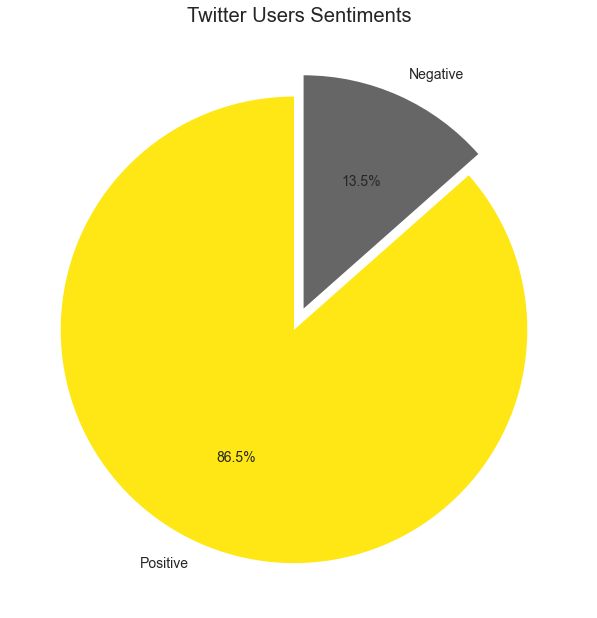

In [85]:
# Plotting a pie chart to show distribution of Sentiments
plt.figure(figsize=[15,10], facecolor='none')
plt.pie(data, labels=['Positive', 'Negative'], colors=['#FEE715', '#666666'], startangle=90, explode= [0.05, 0.05], autopct='%1.1f%%');
plt.title('Twitter Users Sentiments');

In [86]:
# Save to dataframe
plt.savefig("Sentiments.png", format="png")

<Figure size 432x288 with 0 Axes>

**Next, Plotting Tracks to show rank**

In [69]:
track_df_sort = track_df.sort_values('Count', ascending='True')

In [82]:
plt.style.use("seaborn-whitegrid")

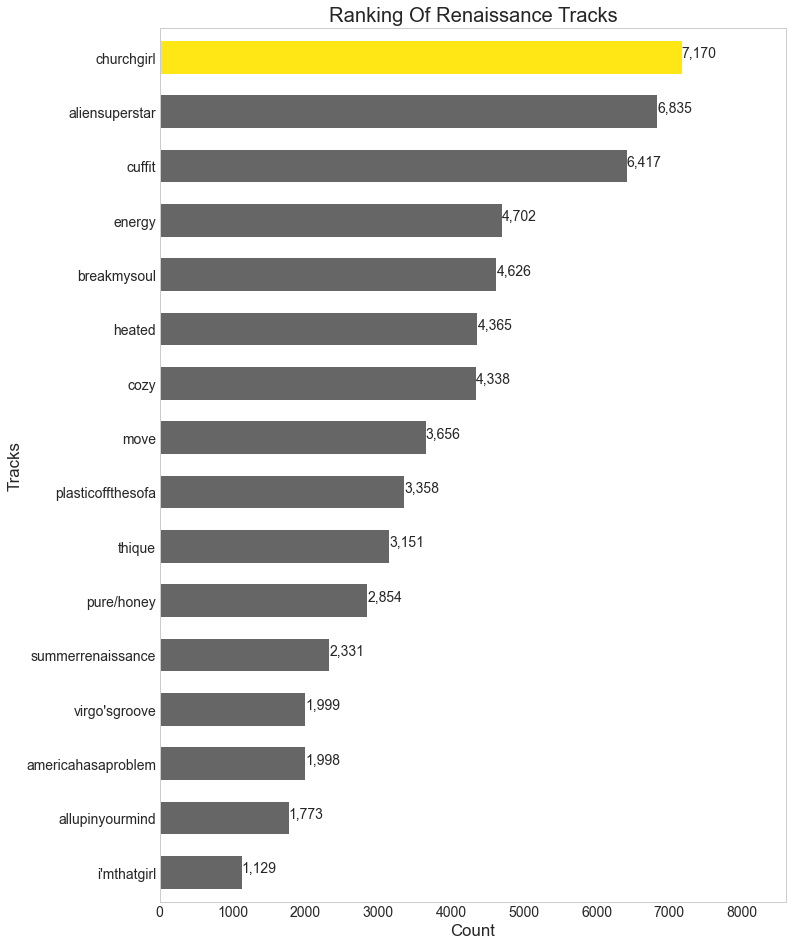

In [83]:
ax = track_df_sort.plot.barh(x='Ren_track', y='Count', figsize=(10,15), legend=None, width=0.6, color=['#666666', '#666666','#666666','#666666','#666666','#666666','#666666','#666666','#666666','#666666','#666666','#666666','#666666','#666666', '#666666', '#FEE715'])
plt.title('Ranking Of Renaissance Tracks');
plt.grid(False)
plt.ylabel('Tracks')
plt.xlabel('Count')
ax.set_facecolor('white')

plt.rcParams['axes.facecolor'] = 'white'


for y, x in enumerate(track_df_sort.Count):
    ax.annotate("{:,}".format(x), xy=(x, y))
    ax.set_xlim(0, track_df_sort.Count.max()*1.2)

plt.show()

In [84]:
# Save to dataframe
plt.savefig("Tracks.png", format="png");

<Figure size 432x288 with 0 Axes>

#### The most Popular tracks is Church Girl, followed by Alien Superstar (a favorite of mine).
#### The least Popular track is I'm That Girl

<br>


**Next, Generating WordClouds**

In [87]:
# Create function to generate the blue colour for the Word CLoud
def yellow_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(54, 99%%, %d%%)" % random.randint(50, 80)

In [88]:
import random

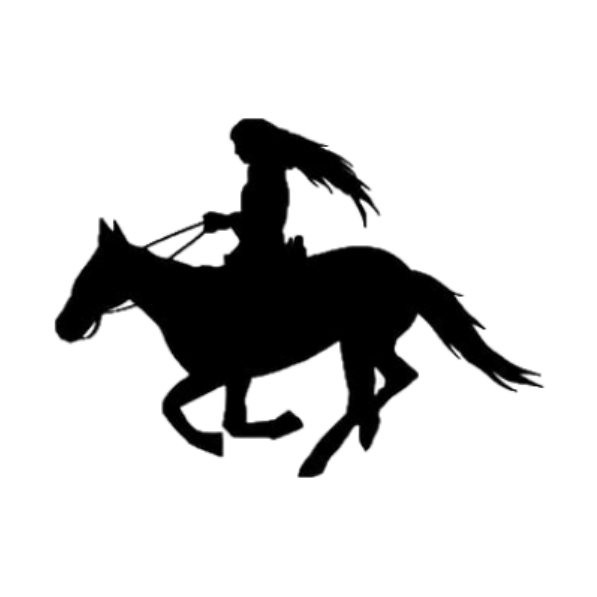

In [97]:
# Import Horse Logo
image = np.array(Image.open('RenaissanceHorse.png'))
    
# Instantiate the figure object
plt.figure(figsize=[15,10], facecolor='none')


plt.imshow(image, cmap=plt.cm.gray, interpolation='bilinear') # Display data as an image
plt.axis('off') # Remove axis
plt.show() # Display image

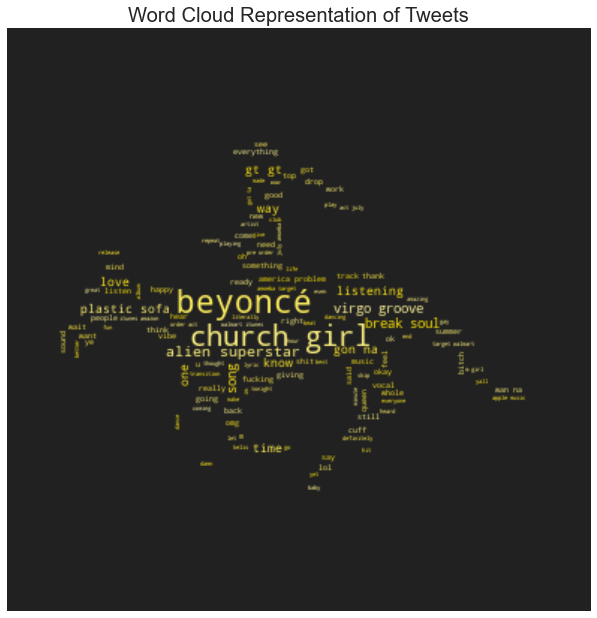

In [103]:
# Instantiate the Twitter word cloud object
twitter_wc = WordCloud(background_color='#212121', mask=image)

# generate the word cloud
twitter_wc.generate(tweets_long_string)

# display the word cloud
plt.figure(figsize=[15,10], facecolor='none')


plt.imshow(twitter_wc.recolor(color_func = yellow_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud Representation of Tweets');
plt.show()

#### As shown above, the most frequent word(s) is beyonce and church girl

In [104]:
# Save to dataframe
plt.savefig("RenaissanceWordCloud.png", format="png")

<Figure size 432x288 with 0 Axes>

## Save the Dataframe to be exported to Microsoft Power BI to Create a Dashboard

In [95]:
tweets_df.to_csv("Renaissance_Final_File.csv", index=False)

**Insert Power BI Dashboard below**

In [1]:
from IPython.display import IFrame
IFrame(src="https://app.powerbi.com/view?r=eyJrIjoiMjU4NTU5NmEtN2VlYy00NTQ0LWE1NzQtODQ2YTI2MjkwYzljIiwidCI6IjNkMDM5YWFlLWE5NGUtNGViMi1iNjVkLWQzYzFhMjU5MmU1YyJ9", height=800, width=836)

## 8. Additional Comments

To Read Further on my thought Process while creating this project; check out the links below.

[Link to Medium Article](https://medium.com/@Nonso_Analytics/beyonces-renaissance-album-a-twitter-sentiment-analysis-dec0e431337d) 

**Get to know me better**<br>
[Link to LinkedIn](https://www.linkedin.com/in/chinonso-okonkwo)<br>
[Link to Twitter](https://twitter.com/Nonso_Analytics)
